### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [30]:
# Load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

In [10]:
# Load the dataset
boston = load_boston()

In [13]:
bos = pd.DataFrame(boston.data)

In [15]:
bos.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [18]:
# Assign column names to the dataset
bos.columns = boston.feature_names

In [19]:
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [22]:
# Attach the Targer to the data set as well
bos['Price'] = pd.DataFrame(boston.target)

In [23]:
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

### DATASET INFO

In [24]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [25]:
bos.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### DATA VALIDATION

#### Check for null values

In [26]:
bos.isnull().sum().sum()

0

#### There are no null values

In [29]:
# Min and the Max prices are:
print ("Minimum Price : ", bos.Price.min())
print ("Maximum Price : ", bos.Price.max())

Minimum Price :  5.0
Maximum Price :  50.0


### FEATURE ENGINEERING

If you see closely there are various features in the dataset that does not effect the Price.

The columns that actually carry any inference to the price will be The features, 'RM', 'LSTAT', and 'PTRATIO'.

<b><u>RM: This is the average number of rooms per dwelling</u></b>
As the number of rooms increases the price will increase

<b><u>LSTAT: This is the percentage lower status of the population</u></b>
Lower status means lower income as a result the Prices would be less. Lower income means more crime rate as well.

<b><u>PTRATIO: This is the pupil-teacher ratio by town</u></b>
If the value is more than, number of pupils will over shoot the number of teachers. This means it would effect education. As a result the Prices should reduce with increase in the number.


In [32]:
# Create the necessary dataset with the above details
boston_df = bos[["RM", "LSTAT", "PTRATIO", "Price"]]
boston_df.head()

RM  LSTAT  PTRATIO  Price
0  6.575   4.98     15.3   24.0
1  6.421   9.14     17.8   21.6
2  7.185   4.03     17.8   34.7
3  6.998   2.94     18.7   33.4
4  7.147   5.33     18.7   36.2

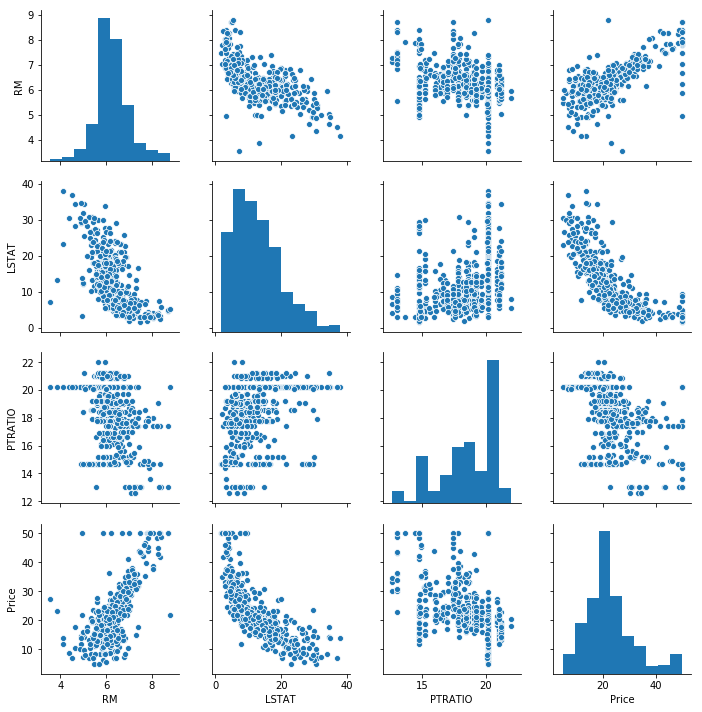

In [34]:
# Plot the pairplot
sns.pairplot(boston_df)

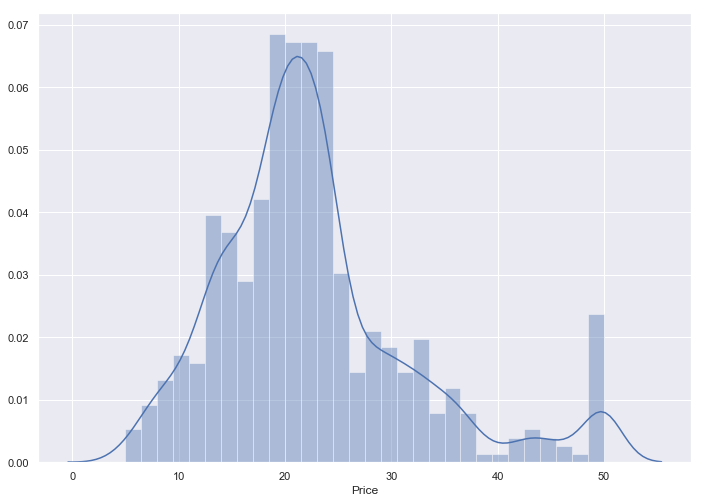

In [101]:
#KDE plot for the Price

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_df['Price'], bins=30)
plt.show()

#### We can see that the data is normally distributed and there are some outliers. We can remove them for more accuracy, but i have retained the for this excercise.

#### Extract the correlation

In [35]:
boston_df.corr()

RM     LSTAT   PTRATIO     Price
RM       1.000000 -0.613808 -0.355501  0.695360
LSTAT   -0.613808  1.000000  0.374044 -0.737663
PTRATIO -0.355501  0.374044  1.000000 -0.507787
Price    0.695360 -0.737663 -0.507787  1.000000

In [37]:
sns.heatmap(boston_df.corr(),annot=True)

### Clearly the features that have been selected have a positive or a negative bearing on the Price

### LINEAR REGRESSION

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [40]:
# Create a model
reg = LinearRegression()

In [68]:
# Apply cross val score
score = cross_val_score(reg, boston_df.iloc[:,:-1], boston_df["Price"], cv=10)

In [69]:
score

array([ 0.76383016,  0.64457435, -0.59161662,  0.5585493 ,  0.60444316,
        0.65850873,  0.05756559,  0.05661888, -1.12985209,  0.47621583])

### Train and Test Method

In [ ]:
from sklearn.model_selection import train_test_split

#### AS you can see the unit in all these columns are different. So lets standardise the data

In [83]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [96]:
scaledInd = scale.fit_transform(boston_df.iloc[:,:-1])

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(scaledInd, boston_df["Price"], test_size=0.3)

In [90]:
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
# Predict for the test data
prediction = reg.predict(X_test)

In [92]:
# Find the R squared intution value
score = r2_score(Y_test, prediction)

In [93]:
score

0.7234847081869975

In [94]:
mse = mean_squared_error(Y_test, prediction)

In [95]:
mse

25.533119487729365

With mean squared error the data is only 75% accurate

In [99]:
### Plot Prices to the Predicted Value

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

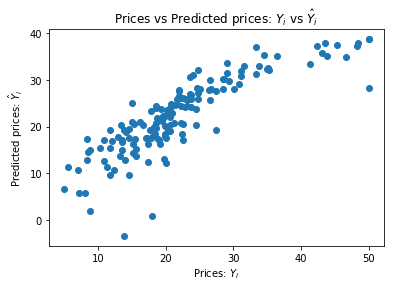

In [98]:
plt.scatter(Y_test, prediction)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")